In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


In [10]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5),(0.5))
])

train_data = datasets.FashionMNIST(root='/home/manchik-pt7714/Documents/ML Tasks/data/temp/',train=True,transform=transform,download=False)
test_data = datasets.FashionMNIST(root='/home/manchik-pt7714/Documents/ML Tasks/data/temp/',train=False,transform=transform,download=False)

train_load = torch.utils.data.DataLoader(train_data, batch_size=100, shuffle=True)
test_load = torch.utils.data.DataLoader(test_data, batch_size=100, shuffle=False)

In [11]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 13 * 13, 150)
        self.fc2 = nn.Linear(150, 10)
        self.dropout = nn.Dropout(0.5)
   
    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = x.view(-1, 32 * 13 * 13)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)  
        x = self.fc2(x)
        return x

model = CNN()


In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)  

In [5]:
count = 100
train_losses = []
val_losses = []

for epoch in range(count):
    model.train()  
    epoch_train_loss = 0.0
    
    for images, labels in train_load:
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()
        
    train_losses.append(epoch_train_loss / len(train_load))
    
    
    model.eval()  
    epoch_val_loss = 0.0
    
    with torch.no_grad(): 
        for images, labels in test_load:
            outputs = model(images)
            loss = criterion(outputs, labels)
            epoch_val_loss += loss.item()
    
    val_losses.append(epoch_val_loss / len(test_load))
    
    
    print(f"Epoch: {epoch + 1}/{count}, Training Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}")
    


Epoch: 1/100, Training Loss: 0.8107, Validation Loss: 0.4951
Epoch: 2/100, Training Loss: 0.4932, Validation Loss: 0.4160
Epoch: 3/100, Training Loss: 0.4241, Validation Loss: 0.3789
Epoch: 4/100, Training Loss: 0.3875, Validation Loss: 0.3533
Epoch: 5/100, Training Loss: 0.3627, Validation Loss: 0.3359
Epoch: 6/100, Training Loss: 0.3438, Validation Loss: 0.3246
Epoch: 7/100, Training Loss: 0.3296, Validation Loss: 0.3151
Epoch: 8/100, Training Loss: 0.3150, Validation Loss: 0.3072
Epoch: 9/100, Training Loss: 0.3051, Validation Loss: 0.2965
Epoch: 10/100, Training Loss: 0.2953, Validation Loss: 0.2968
Epoch: 11/100, Training Loss: 0.2883, Validation Loss: 0.2885
Epoch: 12/100, Training Loss: 0.2793, Validation Loss: 0.2832
Epoch: 13/100, Training Loss: 0.2731, Validation Loss: 0.2801
Epoch: 14/100, Training Loss: 0.2671, Validation Loss: 0.2754
Epoch: 15/100, Training Loss: 0.2619, Validation Loss: 0.2686
Epoch: 16/100, Training Loss: 0.2555, Validation Loss: 0.2710
Epoch: 17/100, Tr

In [6]:
def evaluate_accuracy(loader, model):
    model.eval()  
    correct = 0
    total = 0
    
    with torch.no_grad():  
        for images, labels in loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)  
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    
    accuracy = 100 * correct / total
    return accuracy


test_accuracy = evaluate_accuracy(test_load, model)
print(f"Test Accuracy: {test_accuracy:.2f}%")


Test Accuracy: 92.19%


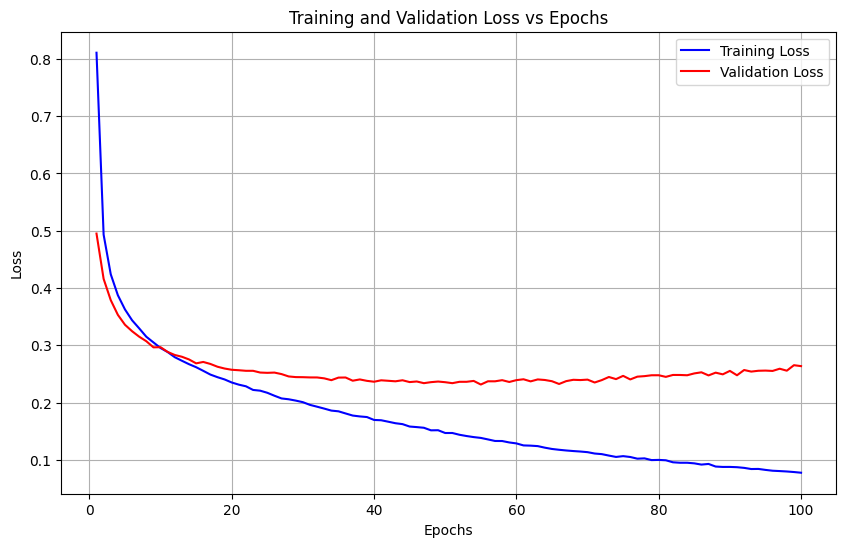

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
count = 100
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
early_stop_patience = 10  
best_val_loss = float('inf')
patience_counter = 0

for epoch in range(count):
    model.train()  
    epoch_train_loss = 0.0
    correct_train = 0
    total_train = 0
    
    for images, labels in train_load:
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_train_loss += loss.item()
    
    train_losses.append(epoch_train_loss / len(train_load))
    train_accuracies.append(100 * correct_train / total_train)  
    
   
    model.eval()  
    epoch_val_loss = 0.0
    correct_val = 0
    total_val = 0
    
    with torch.no_grad(): 
        for images, labels in test_load:
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()
            
            epoch_val_loss += loss.item()
    
    val_losses.append(epoch_val_loss / len(test_load))
    val_accuracies.append(100 * correct_val / total_val) 
    

    print(f"Epoch: {epoch + 1}/{count}, Training Loss: {train_losses[-1]:.4f}, "
          f"Training Accuracy: {train_accuracies[-1]:.2f}%, "
          f"Validation Loss: {val_losses[-1]:.4f}, "
          f"Validation Accuracy: {val_accuracies[-1]:.2f}%")
    

    if val_losses[-1] < best_val_loss:
        best_val_loss = val_losses[-1]
        patience_counter = 0
    else:
        patience_counter += 1
    
    if patience_counter >= early_stop_patience:
        print(f"Early stopping at epoch {epoch + 1}")
        break


Epoch: 1/100, Training Loss: 0.7851, Training Accuracy: 74.05%, Validation Loss: 0.4993, Validation Accuracy: 82.48%
Epoch: 2/100, Training Loss: 0.4981, Training Accuracy: 82.76%, Validation Loss: 0.4219, Validation Accuracy: 84.88%
Epoch: 3/100, Training Loss: 0.4349, Training Accuracy: 84.97%, Validation Loss: 0.3871, Validation Accuracy: 86.14%
Epoch: 4/100, Training Loss: 0.3995, Training Accuracy: 86.09%, Validation Loss: 0.3637, Validation Accuracy: 87.06%
Epoch: 5/100, Training Loss: 0.3760, Training Accuracy: 86.84%, Validation Loss: 0.3500, Validation Accuracy: 87.38%
Epoch: 6/100, Training Loss: 0.3548, Training Accuracy: 87.61%, Validation Loss: 0.3324, Validation Accuracy: 88.06%
Epoch: 7/100, Training Loss: 0.3452, Training Accuracy: 88.02%, Validation Loss: 0.3235, Validation Accuracy: 88.41%
Epoch: 8/100, Training Loss: 0.3274, Training Accuracy: 88.50%, Validation Loss: 0.3138, Validation Accuracy: 88.75%
Epoch: 9/100, Training Loss: 0.3190, Training Accuracy: 88.80%, 

Epoch: 71/100, Training Loss: 0.1248, Training Accuracy: 95.47%, Validation Loss: 0.2352, Validation Accuracy: 91.94%
Epoch: 72/100, Training Loss: 0.1244, Training Accuracy: 95.62%, Validation Loss: 0.2408, Validation Accuracy: 92.06%
Epoch: 73/100, Training Loss: 0.1218, Training Accuracy: 95.63%, Validation Loss: 0.2372, Validation Accuracy: 91.89%
Epoch: 74/100, Training Loss: 0.1196, Training Accuracy: 95.81%, Validation Loss: 0.2365, Validation Accuracy: 91.96%
Early stopping at epoch 74


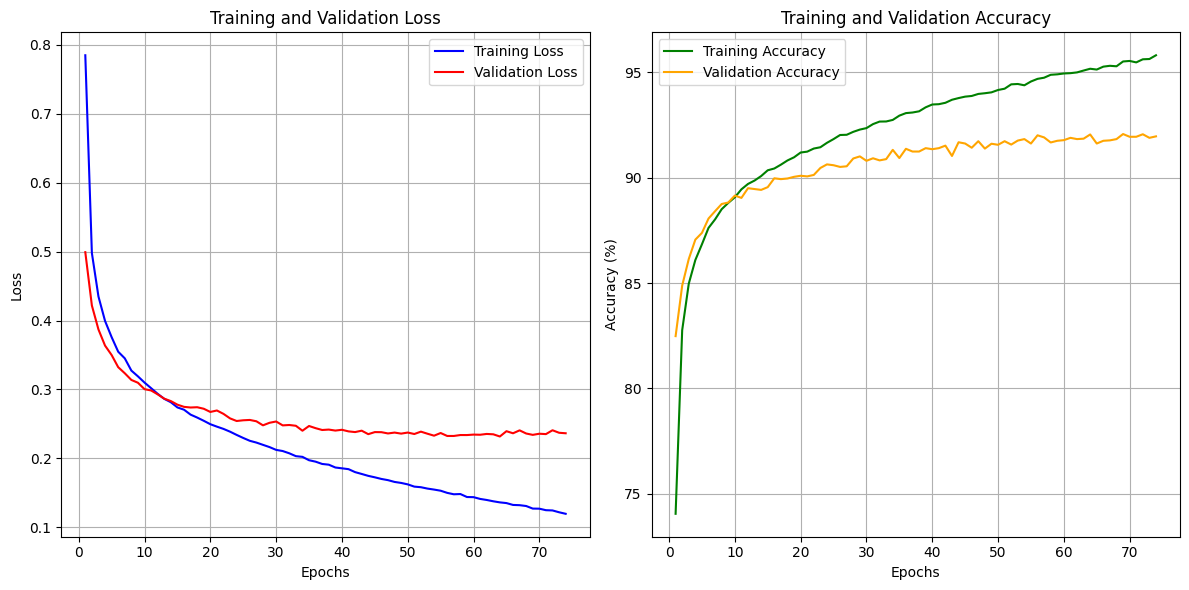

In [17]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)  
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy', color='green')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()